In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
from torchmetrics.classification import BinaryAccuracy
import matplotlib.pyplot as plt

In [2]:
torch.rand(3, 4)

tensor([[0.1711, 0.7521, 0.2807, 0.9293],
        [0.5567, 0.5810, 0.6726, 0.3451],
        [0.2093, 0.7108, 0.7284, 0.8426]])

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
device

'cuda'

In [5]:
def generate_tensor_and_label():
    # Gerar um tensor aleatório de shape (3, 4)
    data = torch.rand((3, 4))

    # Avaliar condições para determinar a saída 0 ou 1
    conditions = []
    
    # Condição 1: Primeira coluna está aumentando?
    conditions.append((data[0, 0] < data[1, 0] < data[2, 0]))

    # Condição 2: Existe algum 1 na segunda coluna?
    conditions.append(any(data[:, 1] > 0.5))  

    # Condição 3: O último valor da terceira coluna é maior que os anteriores?
    conditions.append(data[2, 2] > data[0, 2] and data[2, 2] > data[1, 2])

    # Condição 4: O último valor da quarta coluna é menor que os anteriores?
    conditions.append(data[2, 3] < data[0, 3] and data[2, 3] < data[1, 3])

    # Se pelo menos 2 condições forem verdadeiras, classifica como 1
    label = torch.tensor(1 if sum(conditions) >= 2 else 0)

    return data, label

In [6]:
def generate_samples(n: int):
    samples = [generate_tensor_and_label() for _ in range(n)]
    return samples

In [7]:
samples = generate_samples(100_000)

In [8]:
# Função que gera os tensores com base no filtro e a média
def filter_and_plot(samples):
    # Separando os tensores pelos labels 0 e 1
    label_0 = [tensor_data for tensor_data, label in samples if label.item() == 0]
    label_1 = [tensor_data for tensor_data, label in samples if label.item() == 1]
    
    # Calculando a média para cada elemento (linhas e colunas) para os dois grupos
    mean_tensor_0 = torch.mean(torch.stack(label_0), dim=0)
    mean_tensor_1 = torch.mean(torch.stack(label_1), dim=0)

    # Criando o gráfico
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plotando o grupo 0
    ax = axes[0]
    ax.imshow(mean_tensor_0.numpy(), cmap='coolwarm', vmin=0, vmax=1)
    ax.set_title('Média dos elementos para label 0')
    ax.set_xticks(np.arange(mean_tensor_0.shape[1]))
    ax.set_yticks(np.arange(mean_tensor_0.shape[0]))
    
    # Plotando o grupo 1
    ax = axes[1]
    ax.imshow(mean_tensor_1.numpy(), cmap='coolwarm', vmin=0, vmax=1)
    ax.set_title('Média dos elementos para label 1')
    ax.set_xticks(np.arange(mean_tensor_1.shape[1]))
    ax.set_yticks(np.arange(mean_tensor_1.shape[0]))
    
    # Exibindo o gráfico
    plt.show()

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Função que gera os tensores com base no filtro e a média
def filter_and_plot(samples):
    # Separando os tensores pelos labels 0 e 1
    label_0 = [tensor_data for tensor_data, label in samples if label.item() == 0]
    label_1 = [tensor_data for tensor_data, label in samples if label.item() == 1]
    
    # Verifica se há tensores nos dois grupos antes de calcular a média
    if label_0:
        mean_tensor_0 = torch.mean(torch.stack(label_0), dim=0)
    else:
        mean_tensor_0 = torch.zeros_like(samples[0][0])

    if label_1:
        mean_tensor_1 = torch.mean(torch.stack(label_1), dim=0)
    else:
        mean_tensor_1 = torch.zeros_like(samples[0][0])

    # Criando o gráfico
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Definir colormap
    cmap = "coolwarm"

    # Determinar o range de cores comum
    vmin = min(mean_tensor_0.min(), mean_tensor_1.min()).item()
    vmax = max(mean_tensor_0.max(), mean_tensor_1.max()).item()

    # Plotando o grupo 0
    im0 = axes[0].imshow(mean_tensor_0.numpy(), cmap=cmap, vmin=vmin, vmax=vmax)
    axes[0].set_title('Média dos elementos para label 0')
    axes[0].set_xticks(np.arange(mean_tensor_0.shape[1]))
    axes[0].set_yticks(np.arange(mean_tensor_0.shape[0]))

    # Plotando o grupo 1
    im1 = axes[1].imshow(mean_tensor_1.numpy(), cmap=cmap, vmin=vmin, vmax=vmax)
    axes[1].set_title('Média dos elementos para label 1')
    axes[1].set_xticks(np.arange(mean_tensor_1.shape[1]))
    axes[1].set_yticks(np.arange(mean_tensor_1.shape[0]))

    # Adicionando uma única barra de cores para os dois gráficos
    cbar = fig.colorbar(im1, ax=axes.ravel().tolist(), fraction=0.046, pad=0.04)
    cbar.set_label('Média dos valores')

    # Exibindo o gráfico
    plt.show()


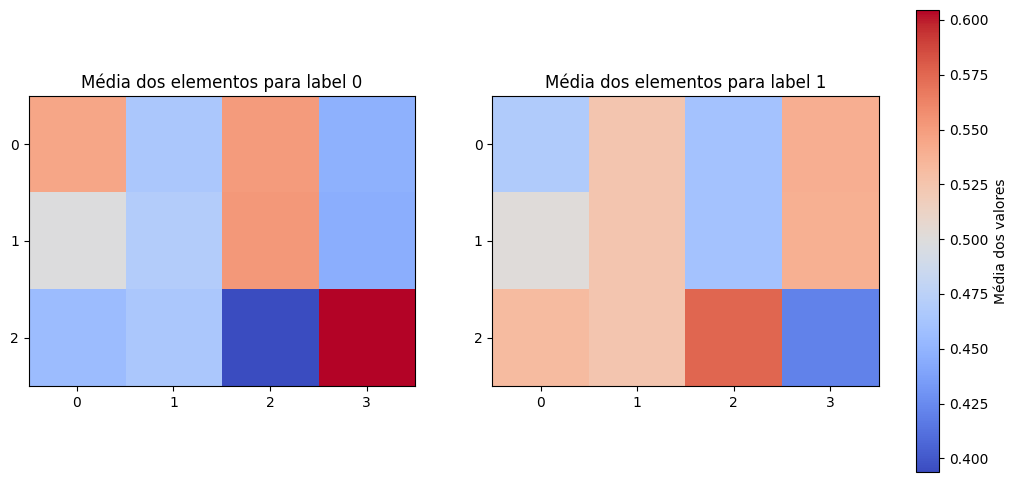

In [10]:
# Plotar o gráfico com médias
filter_and_plot(samples)

In [11]:
X = [item[0] for item in samples]
y = [item[1] for item in samples]

X = torch.stack(X)
y = torch.stack(y) 

In [12]:
X[:, :, 1] = (X[:, :, 1] > 0.6).int()

In [13]:
X[0]

tensor([[0.7546, 1.0000, 0.5207, 0.5737],
        [0.5279, 0.0000, 0.1914, 0.6450],
        [0.2944, 0.0000, 0.0746, 0.8889]])

In [14]:
X = torch.einsum('ijk -> ikj', X)

In [15]:
X[0]

tensor([[0.7546, 0.5279, 0.2944],
        [1.0000, 0.0000, 0.0000],
        [0.5207, 0.1914, 0.0746],
        [0.5737, 0.6450, 0.8889]])

In [16]:
from torch.utils.data import TensorDataset, DataLoader

In [17]:
y = y.unsqueeze(1)
y = y.float()

In [18]:
X = X.to(device)
y = y.to(device)

In [19]:
X_train = X[:70000]
y_train = y[:70000]

X_test = X[70000:]
y_test = y[70000:]

In [20]:
X_train.shape[0] + X_test.shape[0] == X.shape[0]

True

In [21]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [22]:
N = 32

In [23]:
train_dataloader = DataLoader(train_dataset, batch_size=N, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=N, shuffle=True)

In [24]:
torch.manual_seed(42)
_ = nn.Conv1d(in_channels=4, out_channels=4, kernel_size=3, padding='same').to(device)(X[0].unsqueeze(0))
_

tensor([[[ 0.5442,  0.7515,  0.4059],
         [ 0.2187,  0.0150, -0.1982],
         [-0.4257, -0.4944, -0.4660],
         [ 0.4538,  0.1699,  0.0901]]], device='cuda:0',
       grad_fn=<ConvolutionBackward0>)

In [25]:
_ = nn.AvgPool1d(kernel_size=2, stride=1).to(device)(_)
_

tensor([[[ 0.6479,  0.5787],
         [ 0.1169, -0.0916],
         [-0.4601, -0.4802],
         [ 0.3118,  0.1300]]], device='cuda:0', grad_fn=<SqueezeBackward1>)

In [26]:
_ = nn.Conv1d(in_channels=4, out_channels=4, kernel_size=3, padding="same").to(device)(_)
_

tensor([[[ 0.1479, -0.2214],
         [-0.1289, -0.1868],
         [ 0.0900, -0.0689],
         [-0.2393, -0.1507]]], device='cuda:0', grad_fn=<ConvolutionBackward0>)

In [27]:
_ = nn.AvgPool1d(kernel_size=2, stride=1).to(device)(_)
_

tensor([[[-0.0368],
         [-0.1578],
         [ 0.0105],
         [-0.1950]]], device='cuda:0', grad_fn=<SqueezeBackward1>)

In [28]:
_ = nn.Flatten().to(device)(_)
_

tensor([[-0.0368, -0.1578,  0.0105, -0.1950]], device='cuda:0',
       grad_fn=<ViewBackward0>)

In [29]:
_ = nn.Linear(4, 4).to(device)(_)
_

tensor([[ 0.1041, -0.1329,  0.0623, -0.2161]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [30]:
_ = nn.Linear(4, 1).to(device)(_)

In [31]:
_

tensor([[0.4969]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [32]:
nn.Sigmoid().to(device)(_)

tensor([[0.6217]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [33]:
class FeatureEngNN(nn.Module):
    def __init__(
        self, 
        input_dim: int, 
        output_dim: int, 
        n_months: int,
        dropout: float = 0.1
    ) -> None:
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(
                in_channels=input_dim,
                out_channels=output_dim,
                kernel_size=n_months, 
                padding='same'
            ),
            nn.ReLU(),
            nn.Dropout1d(dropout),
            nn.AvgPool1d(
                kernel_size=2,
                stride=1
            ),
            nn.Conv1d(
                in_channels=input_dim, 
                out_channels=output_dim, 
                kernel_size=n_months, 
                padding="same"
            ),
            nn.AvgPool1d(
                kernel_size=2, 
                stride=1
            ),
            nn.ReLU(),
            nn.Dropout1d(dropout),

            nn.Flatten()
        )
        self.linear = nn.Sequential(
            nn.Linear(output_dim, output_dim),
            nn.ReLU(),
            nn.Linear(output_dim, 4)
        )
        self.output_layer = nn.Sequential(
            nn.Linear(4, 1),
            nn.Sigmoid()
        )

    def embedding(self, x):
        x = self.conv(x)
        x = self.linear(x)
        return x

    def forward(self, x):
        x = self.embedding(x)
        x = self.output_layer(x)
        return x

In [34]:
model = FeatureEngNN(
    input_dim=4,
    output_dim=4,
    n_months=3
).to(device)

In [35]:
LR = 1e-4

In [36]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [37]:
EPOCHS = 100

In [38]:
accuracy_metric = BinaryAccuracy().to(device)

In [39]:
for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    accuracy_metric.reset()
    for x, y in train_dataloader:
        y_hat = model(x)
        loss = criterion(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        accuracy_metric.update(y_hat, y)
        epoch_loss += loss.item()
    epoch_accuracy = accuracy_metric.compute()
    print(
        f"Epoch {epoch+1}/{EPOCHS} | "
        f"Loss: {epoch_loss / len(train_dataloader):.4f} | " 
        f"Accuracy: {epoch_accuracy:.3f}"
    )

Epoch 1/100 | Loss: 0.6873 | Accuracy: 0.548
Epoch 2/100 | Loss: 0.6758 | Accuracy: 0.573
Epoch 3/100 | Loss: 0.6388 | Accuracy: 0.636
Epoch 4/100 | Loss: 0.5975 | Accuracy: 0.677
Epoch 5/100 | Loss: 0.5719 | Accuracy: 0.697
Epoch 6/100 | Loss: 0.5573 | Accuracy: 0.709
Epoch 7/100 | Loss: 0.5422 | Accuracy: 0.723
Epoch 8/100 | Loss: 0.5302 | Accuracy: 0.732
Epoch 9/100 | Loss: 0.5250 | Accuracy: 0.737
Epoch 10/100 | Loss: 0.5172 | Accuracy: 0.743
Epoch 11/100 | Loss: 0.5090 | Accuracy: 0.750
Epoch 12/100 | Loss: 0.5063 | Accuracy: 0.751
Epoch 13/100 | Loss: 0.5041 | Accuracy: 0.753
Epoch 14/100 | Loss: 0.5017 | Accuracy: 0.753
Epoch 15/100 | Loss: 0.4992 | Accuracy: 0.757
Epoch 16/100 | Loss: 0.4969 | Accuracy: 0.758
Epoch 17/100 | Loss: 0.4947 | Accuracy: 0.760
Epoch 18/100 | Loss: 0.4922 | Accuracy: 0.761
Epoch 19/100 | Loss: 0.4938 | Accuracy: 0.758
Epoch 20/100 | Loss: 0.4918 | Accuracy: 0.760
Epoch 21/100 | Loss: 0.4891 | Accuracy: 0.763
Epoch 22/100 | Loss: 0.4896 | Accuracy: 0.7

In [40]:
with torch.inference_mode():
    model.eval()
    embeddings = model.embedding(X_test)
    y_pred = model(X_test)

In [41]:
y_pred

tensor([[0.5758],
        [0.2221],
        [0.0676],
        ...,
        [0.7886],
        [0.9755],
        [0.3283]], device='cuda:0')

In [42]:
y_test

tensor([[1.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [0.]], device='cuda:0')

In [43]:
embeddings

tensor([[-0.3797,  0.2918, -0.7114,  0.3193],
        [-0.7211, -0.1198, -0.5718,  0.7489],
        [-1.0330, -0.4707, -0.4975,  1.1470],
        ...,
        [-0.1670,  0.5669, -0.8380,  0.0559],
        [ 0.3257,  1.2173, -1.1589, -0.5510],
        [-0.5988,  0.0177, -0.6009,  0.5928]], device='cuda:0')

In [44]:
y_true = y_test.cpu().numpy()
embeddings = embeddings.cpu().numpy()

In [53]:
import matplotlib.colors as mcolors
colors = ['blue', 'red']
cmap = mcolors.ListedColormap(colors)

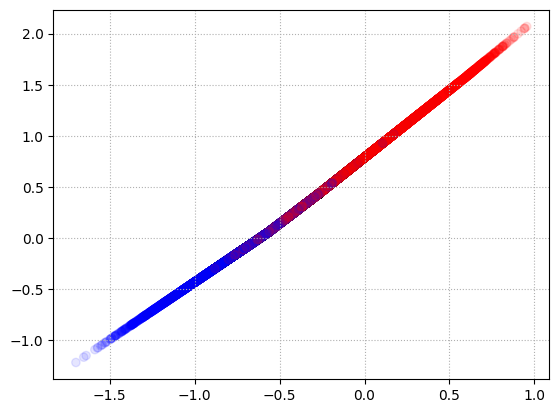

In [58]:
fig, ax = plt.subplots()
ax.scatter(
    embeddings[:, 0], 
    embeddings[:, 1], 
    c=y_true, 
    cmap=cmap,
    alpha=0.1
)
ax.grid(True, linestyle=':')
plt.show()

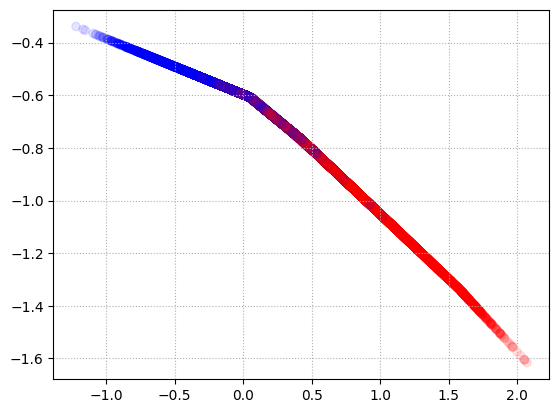

In [59]:
fig, ax = plt.subplots()
ax.scatter(
    embeddings[:, 1], 
    embeddings[:, 2], 
    c=y_true, 
    cmap=cmap,
    alpha=0.1
)
ax.grid(True, linestyle=':')
plt.show()

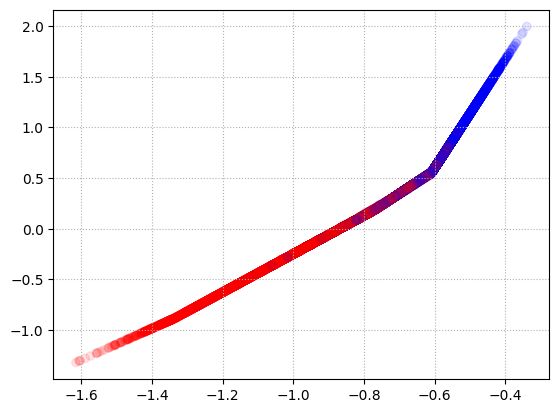

In [60]:
fig, ax = plt.subplots()
ax.scatter(
    embeddings[:, 2], 
    embeddings[:, 3], 
    c=y_true, 
    cmap=cmap,
    alpha=0.1
)
ax.grid(True, linestyle=':')
plt.show()